
# Financial Performance Analysis of Microsoft, Tesla, and Apple
This analysis evaluates the financial performance of Microsoft, Tesla, and Apple from fiscal years 2021 to 2023. The key financial metrics assessed include Total Revenue, Net Income, Total Assets, Total Liabilities, and Cash Flow from Operating Activities.
The goal is to identify trends and insights that reflect the financial health of these companies.

## Methodology
1. **Data Collection**: Financial data for Microsoft, Tesla, and Apple was gathered for the fiscal years 2021-2023.
2. **Data Preparation**: The data was organized into a DataFrame using pandas, ensuring that all values were in a numerical format for analysis.
3. **Calculations**: Year-over-year percentage changes were calculated for each financial metric using the `pct_change()` function.
4. **Analysis**: Trends were analyzed to assess the performance and financial health of each company.




In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Load your CSV file into a pandas DataFrame
df = pd.read_csv('D:/BCG-GenAI/financial data from the 10-K filings.csv')

# Display the first few rows of the DataFrame to verify
df.head()


,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
0,Microsoft,2023,"211,915","72,361","411,976","205,753","87,582"
1,Microsoft,2022,"198,270","72,738","364,840","198,298","89,035"
2,Microsoft,2021,"168,088","61,271","333,779","191,791","76,740"
3,Tesla,2023,"96,773","14,974","106,618","43,009","13,256"
4,Tesla,2022,"81,462","12,587","82,338","36,440","14,724"


In [8]:
# Columns to remove commas from
columns_to_clean = ['Total Revenue', 'Net Income', 'Total Assets', 'Total Liabilities', 'Cash Flow from Operating Activities']

print(df.head())

     Company  Fiscal Year Total Revenue Net Income Total Assets  \
0  Microsoft         2023       211,915     72,361      411,976   
1  Microsoft         2022       198,270     72,738      364,840   
2  Microsoft         2021       168,088     61,271      333,779   
3      Tesla         2023        96,773     14,974      106,618   
4      Tesla         2022        81,462     12,587       82,338   

  Total Liabilities Cash Flow from Operating Activities  
0           205,753                              87,582  
1           198,298                              89,035  
2           191,791                              76,740  
3            43,009                              13,256  
4            36,440                              14,724  


In [9]:
# Remove commas and convert to numeric
for column in columns_to_clean:
    df[column] = df[column].str.replace(',', '').astype(float)

# Print the head of the DataFrame to inspect the changes
print(df.head())

     Company  Fiscal Year  Total Revenue  Net Income  Total Assets  \
0  Microsoft         2023       211915.0     72361.0      411976.0   
1  Microsoft         2022       198270.0     72738.0      364840.0   
2  Microsoft         2021       168088.0     61271.0      333779.0   
3      Tesla         2023        96773.0     14974.0      106618.0   
4      Tesla         2022        81462.0     12587.0       82338.0   

   Total Liabilities  Cash Flow from Operating Activities  
0           205753.0                              87582.0  
1           198298.0                              89035.0  
2           191791.0                              76740.0  
3            43009.0                              13256.0  
4            36440.0                              14724.0  


In [10]:
# Check data types
print(df.dtypes)

# If necessary, convert columns to numeric
for column in columns_to_clean:
    if df[column].dtype != 'float64' and df[column].dtype != 'int64':
        df[column] = pd.to_numeric(df[column], errors='coerce')  # 'coerce' will handle errors by setting invalid values to NaN

# ... (rest of your code)

Company                                 object
Fiscal Year                              int64
Total Revenue                          float64
Net Income                             float64
Total Assets                           float64
Total Liabilities                      float64
Cash Flow from Operating Activities    float64
dtype: object


In [11]:
# Calculate year-over-year percentage changes
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Total Assets Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Total Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Cash Flow from Operating Activities'].pct_change() * 100


In [12]:
print(df)

     Company  Fiscal Year  Total Revenue  Net Income  Total Assets  \
0  Microsoft         2023       211915.0     72361.0      411976.0   
1  Microsoft         2022       198270.0     72738.0      364840.0   
2  Microsoft         2021       168088.0     61271.0      333779.0   
3      Tesla         2023        96773.0     14974.0      106618.0   
4      Tesla         2022        81462.0     12587.0       82338.0   
5      Tesla         2021        53823.0      5644.0       62131.0   
6      Apple         2023       383285.0     96995.0      352583.0   
7      Apple         2022       394328.0     99803.0      352755.0   
8      Apple         2021       365817.0     94680.0      351002.0   

   Total Liabilities  Cash Flow from Operating Activities  Revenue Growth (%)  \
0           205753.0                              87582.0                 NaN   
1           198298.0                              89035.0           -6.438902   
2           191791.0                              76740.

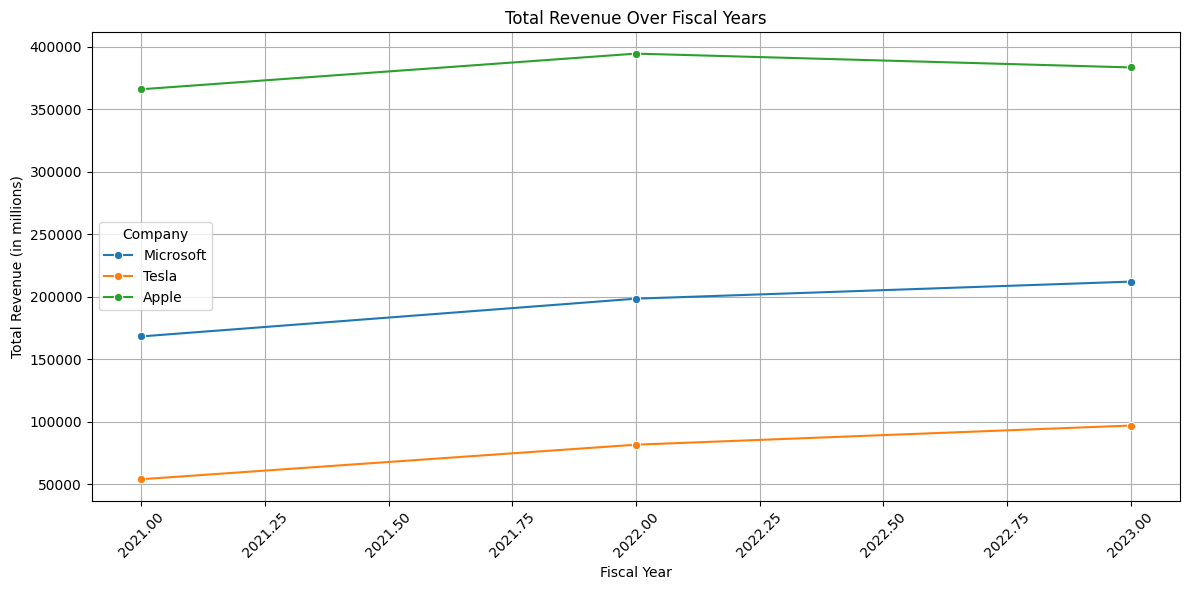

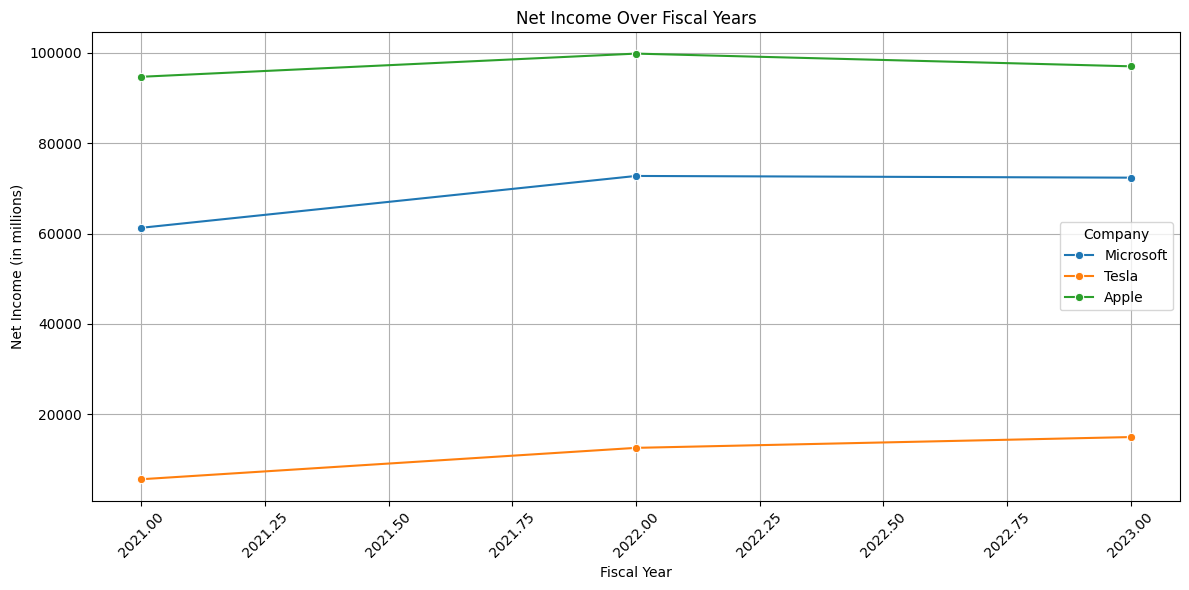

In [13]:
# Plotting Total Revenue
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Fiscal Year', y='Total Revenue', hue='Company', marker='o')
plt.title('Total Revenue Over Fiscal Years')
plt.ylabel('Total Revenue (in millions)')
plt.xlabel('Fiscal Year')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.grid()
plt.tight_layout()
plt.show()

# Plotting Net Income
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Fiscal Year', y='Net Income', hue='Company', marker='o')
plt.title('Net Income Over Fiscal Years')
plt.ylabel('Net Income (in millions)')
plt.xlabel('Fiscal Year')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.grid()
plt.tight_layout()
plt.show()


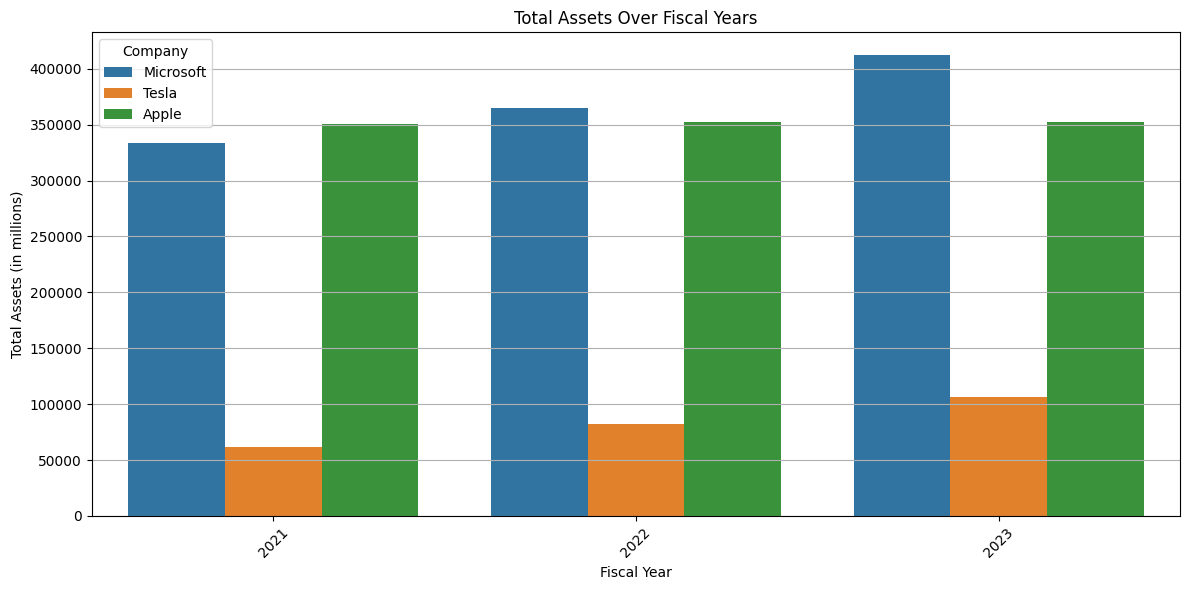

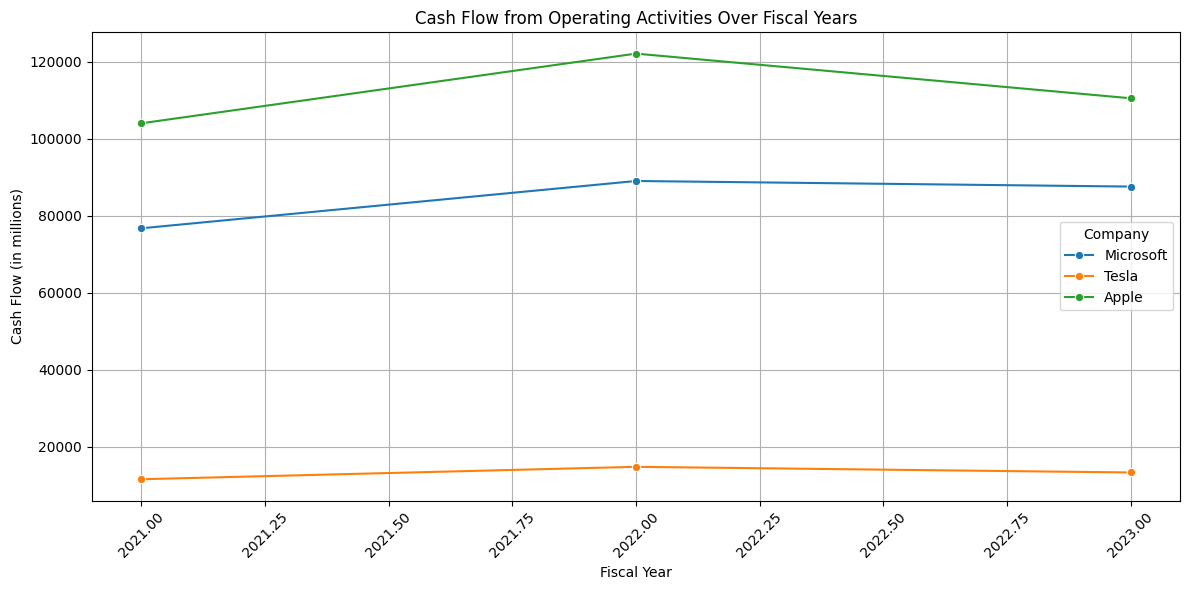

In [14]:
#Plotting Total Assets
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Fiscal Year', y='Total Assets', hue='Company')
plt.title('Total Assets Over Fiscal Years')
plt.ylabel('Total Assets (in millions)')
plt.xlabel('Fiscal Year')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Plotting Cash Flow

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Fiscal Year', y='Cash Flow from Operating Activities', hue='Company', marker='o')
plt.title('Cash Flow from Operating Activities Over Fiscal Years')
plt.ylabel('Cash Flow (in millions)')
plt.xlabel('Fiscal Year')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.grid()
plt.tight_layout()
plt.show()

## Observations
### Microsoft
- Total Revenue declined by 6.44% from 2022 to 2023.
- Net Income decreased by 15.76% in 2023.
- Total Assets decreased significantly, indicating potential challenges.

### Tesla
- Total Revenue showed a significant decline of 15.82% in 2023.
- Net Income also fell by 15.94%.
- Cash Flow from Operating Activities improved, indicating better cash generation capabilities.

### Apple
- Revenue saw a slight decline of 2.88% from 2022 to 2023.
- Net Income decreased by 5.13%, reflecting mixed performance.
- Maintained stable cash flow, demonstrating effective management.


## Conclusions
All three companies faced financial challenges in the latest fiscal year, with declines in revenue and net income. While Microsoft and Tesla experienced more severe impacts, Apple showed better cash flow management. These insights can guide stakeholders in their decision-making and strategic planning.
